In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare global variables
w = np.array([1, 2, 3, 4]) # w0, w1, w2
w = w.reshape(w.size, 1)

In [3]:
# Define dataset

def get_label(x, sigma=0.5, mu=0.0):
    noise = sigma * np.random.randn(x.size) + mu
    return np.sin(2 * math.pi * x) + noise

def gen_dataset(N, sigma=0.5, mu=0.0):
    x = np.linspace(0, 1, N) # We want to keep the argument between 0 and 2pi
    return x, get_label(x, sigma, mu)

In [4]:
# Generate dataset
x_train, y_train = gen_dataset(200)

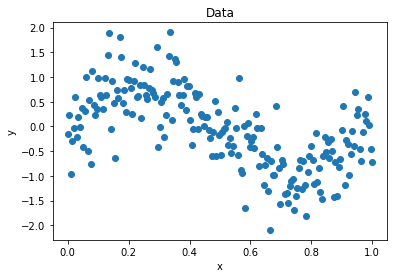

In [5]:
# See dataset
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.show()

In [6]:
# Transformation function will apply to each of the dimensions of each input
# Define model
def poly_model(x, w, order=2): # Order means highest degree of the polynomial which is (w.size-1)
    x = np.expand_dims(x, axis=1) # Vectorise x so that we can avoid looping
    x = np.repeat(x, order+1, axis=1) # Repeat each element of x by (order+1) times to the columns
    
    exp = np.linspace(0, order, order+1) # Array of exponents (from 0 to w.size), linspace because float
    
    phi = x ** exp
    
    output = phi.dot(w) # Final result is the sum of all w*(x**n)
    return output, phi

In [7]:
# Objective function (mean square error)
def obj(y_true, y_guess):
    return np.square(y_true - y_guess).mean()

# Optimisation
def get_best_weight(x, w, order=2, sigma=0.5, mu=0.0):
    y_guess, phi = poly_model(x, w, order)
    y_true = get_label(x, sigma, mu)
    phi_T_phi = phi.T.dot(phi)
    phi_T_phi_inv = np.linalg.inv(phi_T_phi)
    phi_T_phi_inv_phi_T = phi_T_phi_inv.dot(phi.T)
    
    w_new = (phi_T_phi_inv_phi_T).dot(y_true)
    return w_new.reshape(order+1, 1)


In [8]:
# First guess
y_guess, phi = poly_model(x_train, w, w.size-1)


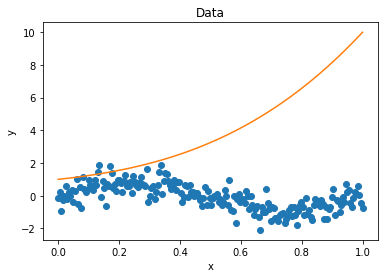

In [9]:
# See first guess
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_guess)
plt.show()

In [10]:
# Training, direct calculation
w_new = get_best_weight(x_train, w, w.size-1)

In [11]:
# Update new guess
y_guess2, phi = poly_model(x_train, w_new, w_new.size-1)

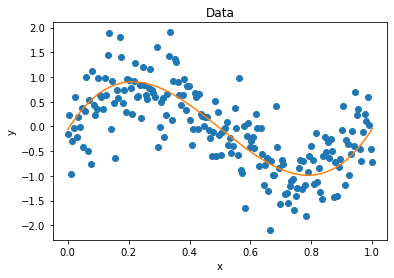

In [12]:
# Prediction after training, order 3
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_guess2)
plt.show()